In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from matplotlib.gridspec import GridSpec
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from scipy.stats import pearsonr
import seaborn as sns

In [3]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): eta = h_pd['h']/data_['A']
	else: eta = data_['h']/data_['A']
	if a==None: a,b=0,1
	E=0
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5):
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		E+=sum((a*t[i]+b)*N_t*phi_t)
	return E

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

# $\phi$ vs age (Total age)

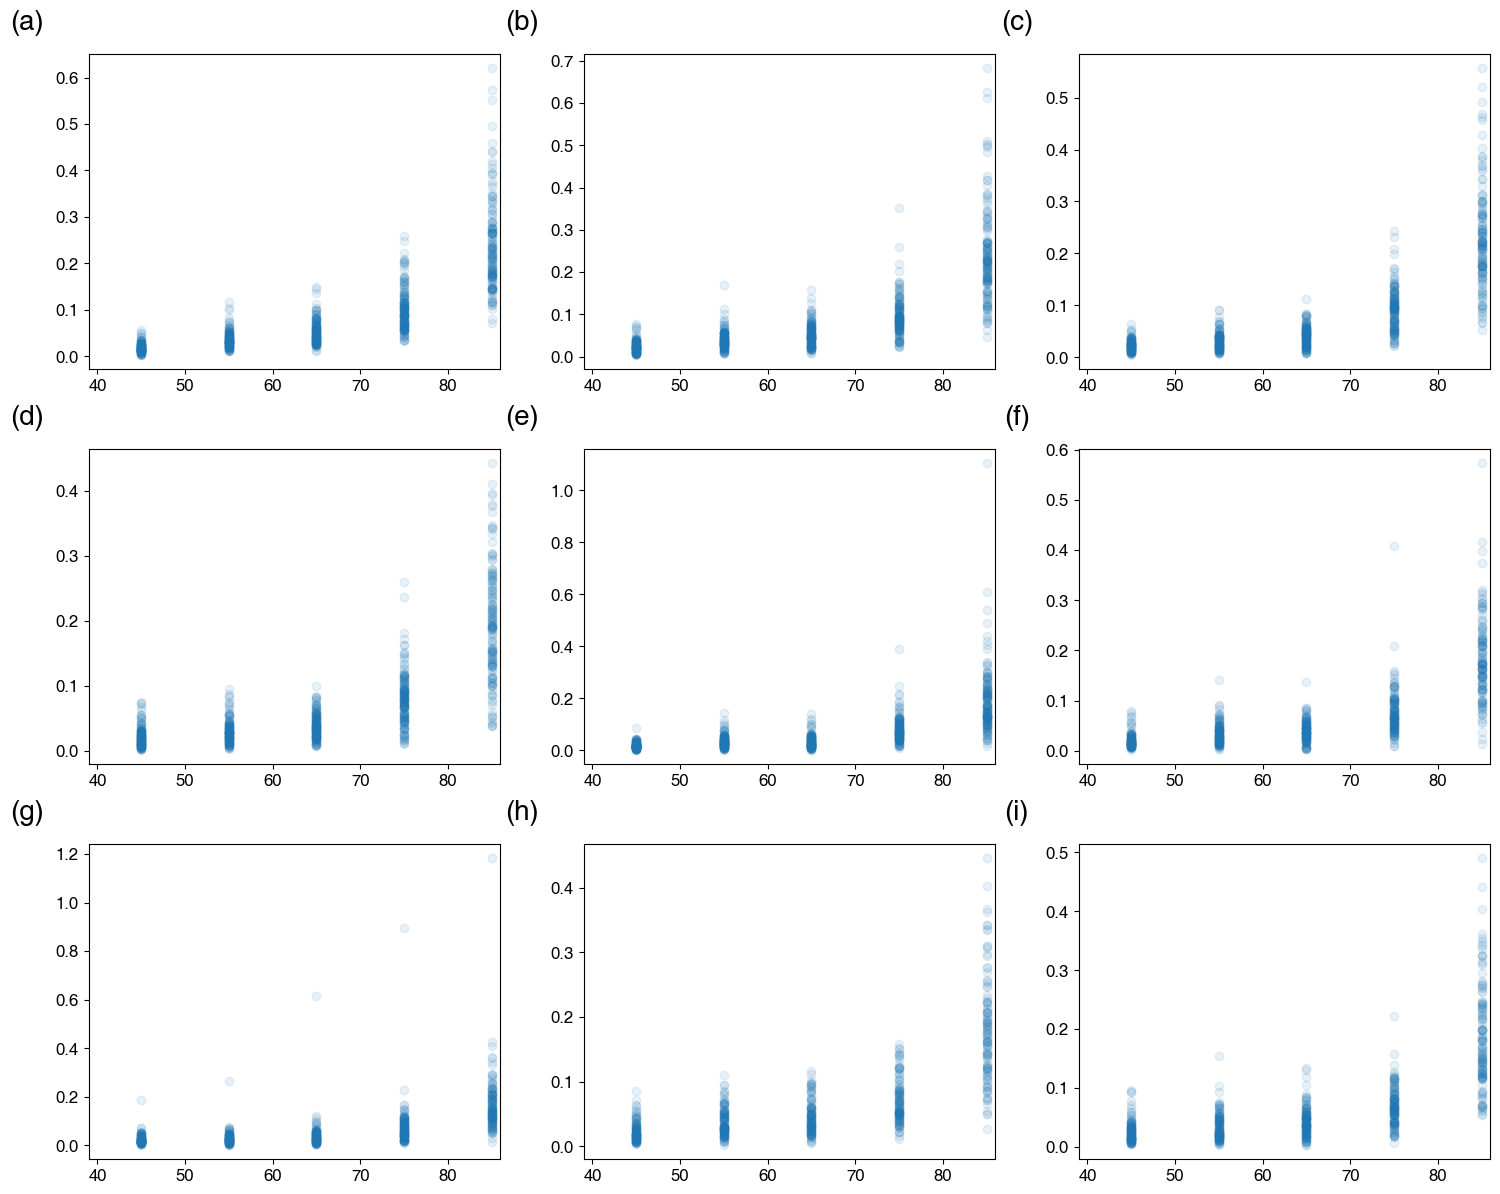

In [18]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c=0
corr_list = []

for year in range(2014, 2023):
    path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
    data = pd.read_csv(path, sep=',')
    N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
    D = data.iloc[:, 15:24].copy().mul(data['D'],axis=0)
    phi_df = D.iloc[:, :] / N.iloc[:, :].values
    phi_df.columns = phi_df.columns.str.slice(start=2)
    age_list = []
    phi_list = []
    age_num_list = [45, 55, 65, 75, 85]
    for i in range(5):
        age_list+=[age_num_list[i]]*len(data)
        phi_list+=list(phi_df[phi_df.columns[4:][i]])
    corr, p_value = pearsonr(age_list, phi_list)
    corr_list.append(corr)
    
    ax = fig.add_subplot(gs[c//3, c%3])
    ax.scatter(age_list, phi_list, alpha=0.1)
    ax.set_xlim(39, 86)

    # ax.set_xlabel(r'$a$',size=20)
    # ax.set_ylabel(r'$E^{\prime\mathrm{(min)}}_\mathrm{fatalities}$',size=20)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
	# ax.legend(fontsize='large')
    ax.text(title_pos[0], title_pos[1], '('+title_list[c]+')', fontsize=title_size,  ha='center', va='center',transform=ax.transAxes)
    c+=1
plt.tight_layout()
# plt.savefig()
plt.show()

In [24]:
corr_list

[0.7610093415060851,
 0.7126887134682108,
 0.7376835937790616,
 0.7192061029035656,
 0.6250052089500502,
 0.6982932996593235,
 0.5246859353938139,
 0.6944763436427299,
 0.680574988958758]

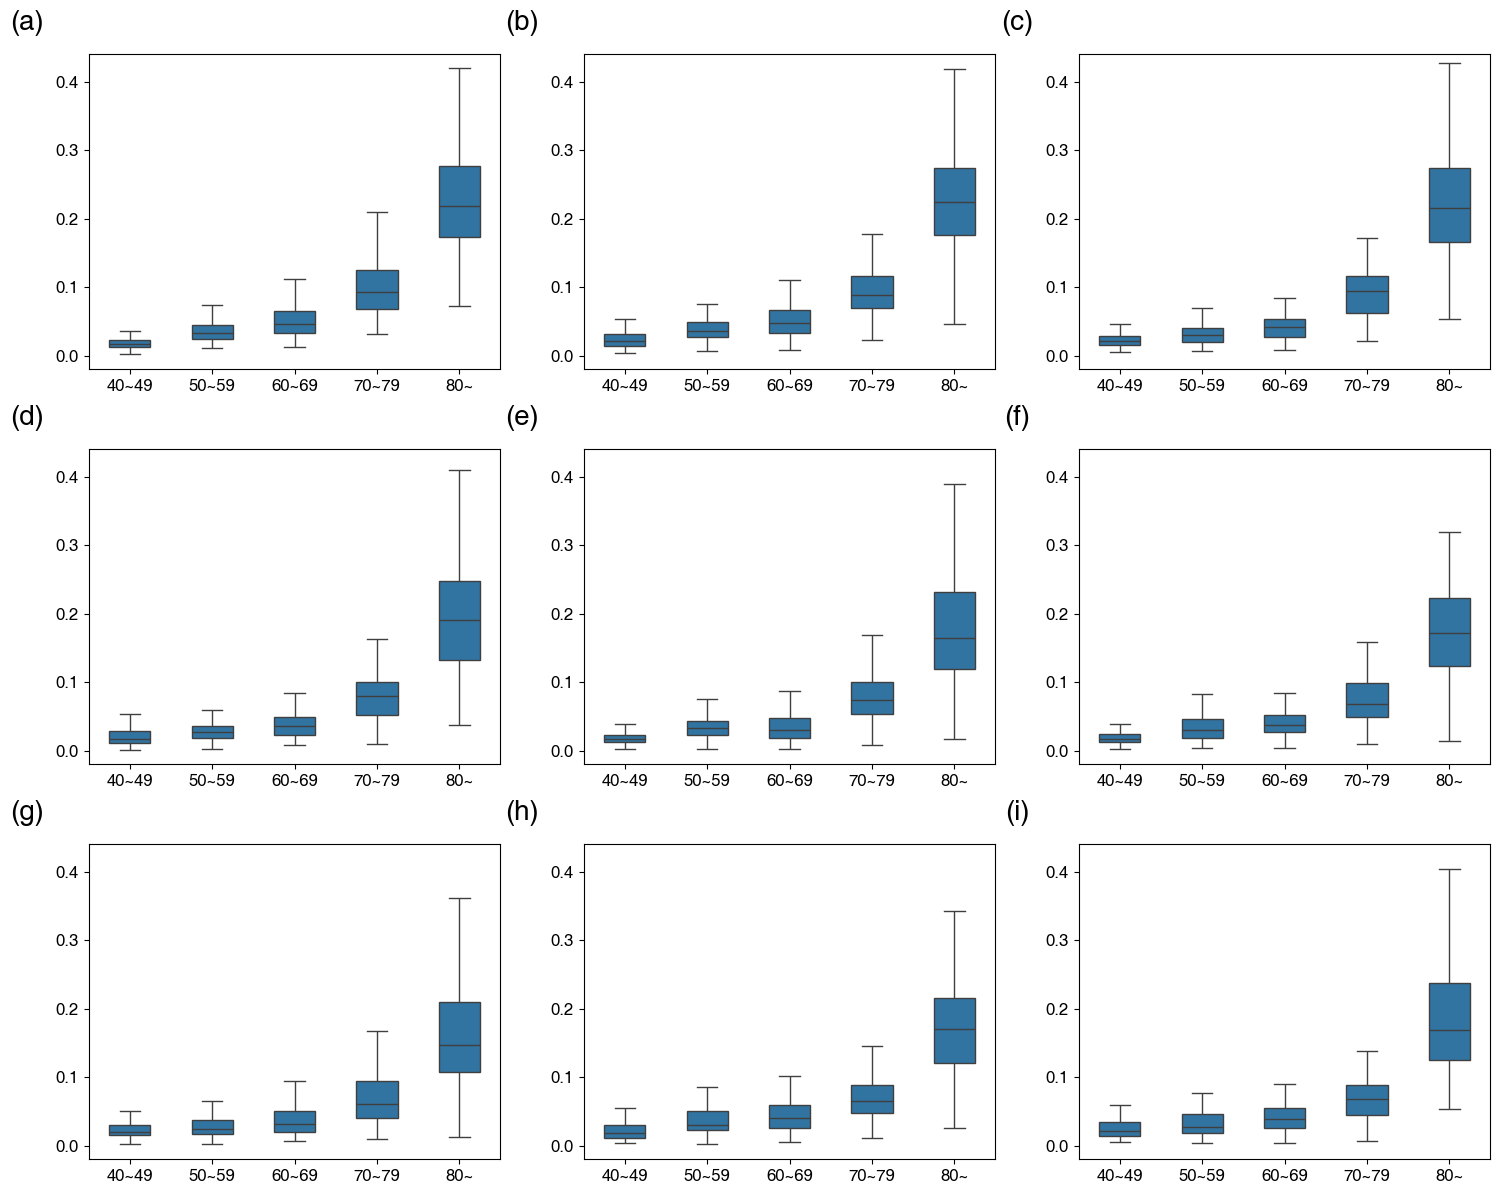

In [39]:
title_pos = [-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c = 0
corr_list = []
age_labels = ["40~49", "50~59", "60~69", "70~79", "80~"]

for year in range(2014, 2023):
    path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
    data = pd.read_csv(path, sep=',')
    N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
    D = data.iloc[:, 15:24].copy().mul(data['D'],axis=0)
    phi_df = D.iloc[:, :] / N.iloc[:, :].values
    phi_df.columns = phi_df.columns.str.slice(start=2)
    age_list = []
    age_label_list = []
    phi_list = []
    age_num_list = [45, 55, 65, 75, 85]
    for i in range(5):
        age_list+=[age_num_list[i]]*len(data)
        age_label_list+=[age_labels[i]]*len(data)
        phi_list+=list(phi_df[phi_df.columns[4:][i]])
    corr, p_value = pearsonr(age_list, phi_list)
    corr_list.append(corr)

    ax = fig.add_subplot(gs[c // 3, c % 3])
    sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False)  

    # ax.set_xlim(-1, 5)
    ax.set_ylim(-0.02, 0.44)
    # ax.set_xticks(range(5))
    # ax.set_xticklabels(age_num_list)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.text(title_pos[0], title_pos[1], f'({title_list[c]})', fontsize=title_size,
            ha='center', va='center', transform=ax.transAxes)
    c += 1

plt.tight_layout()
plt.show()

In [35]:
age_label_list

['40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',
 '40~49',


# $E$ vs $a$

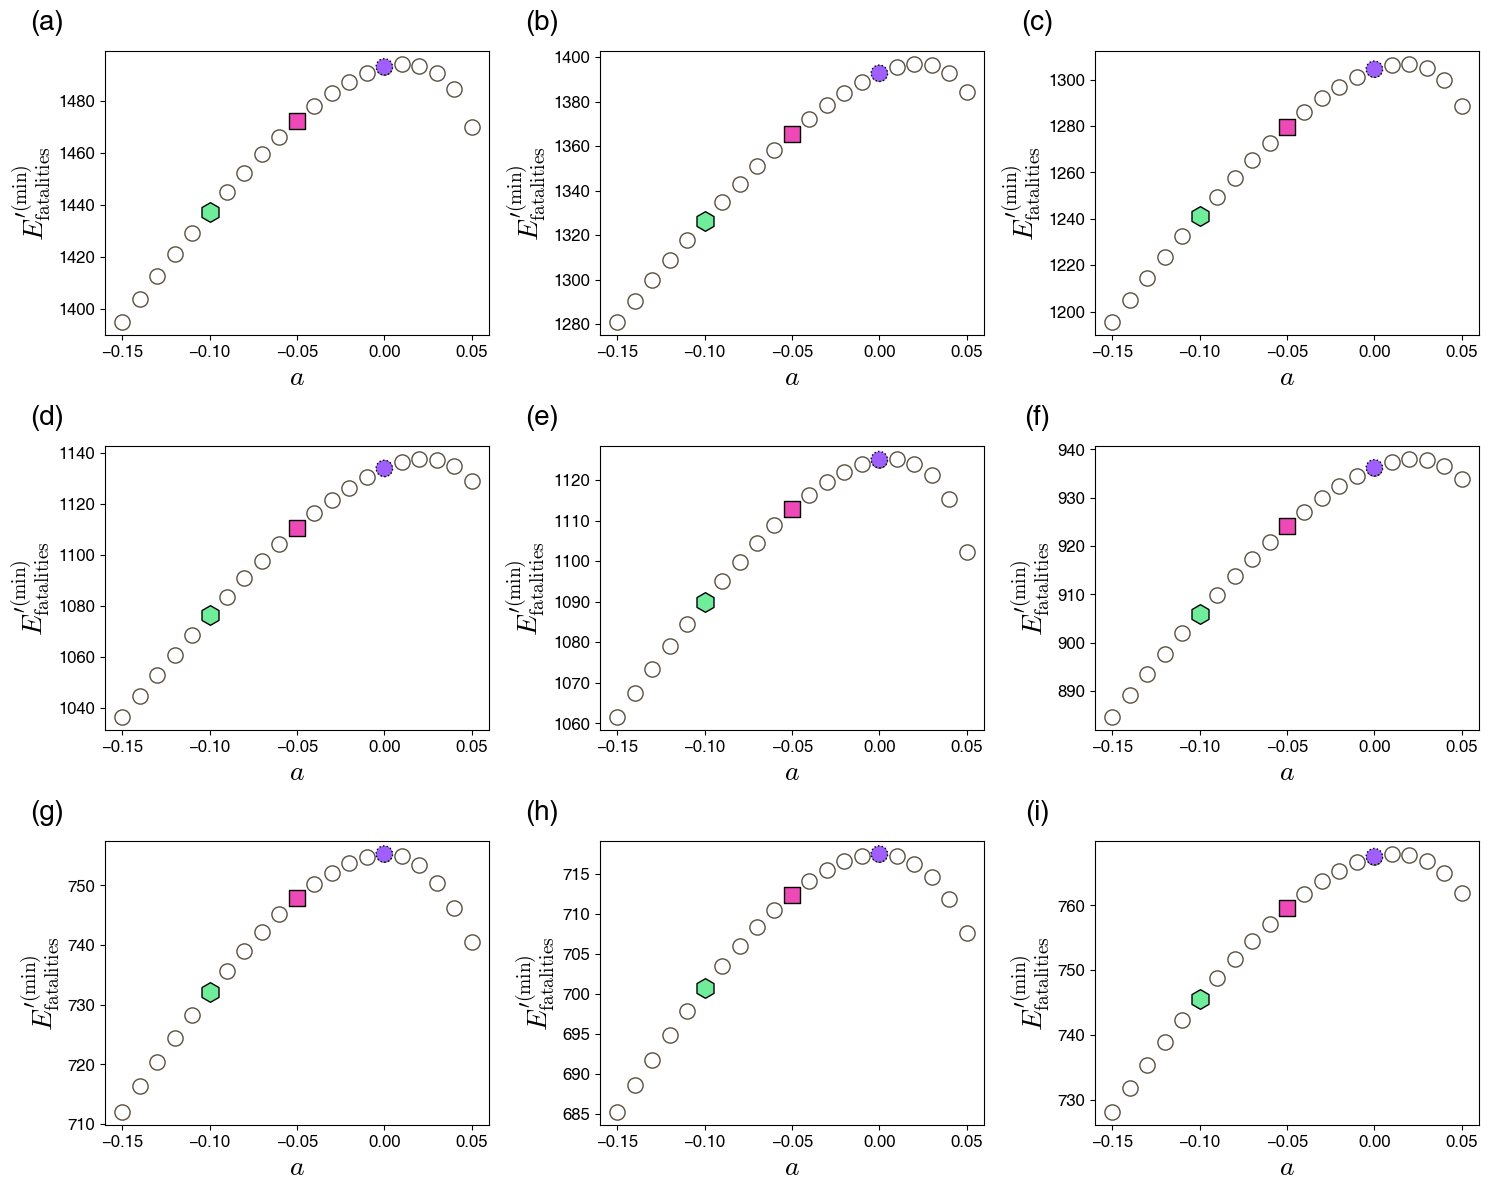

In [7]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']

save_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c=0
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/dataframe_40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		# h_opt = pd.read_csv(save_path+str(year)+'MC_age_h_opt_a_'+str(ai)+'.csv')
		# E_list.append(E(data, h_pd=h_opt))

		ai+=1
	ax = fig.add_subplot(gs[c//3, c%3])
	# ax.plot(np.linspace(-0.15,0.05,21), [E(data)]*21, 'r--')
	ax.scatter(np.linspace(-0.15,0.05,21), E_list, c='w', s=120, ec=rgb_to_hex(89,80,65)) #label=str(year)
	ax.scatter(np.linspace(-0.15,0.05,21)[15], E_list[15], marker='o', ec='k',s=140,c=rgb_to_hex(158,95,253),linestyle=':')
	ax.scatter(np.linspace(-0.15,0.05,21)[10], E_list[10], marker='s', ec='k',s=120,c=rgb_to_hex(237,74,184))
	ax.scatter(np.linspace(-0.15,0.05,21)[5], E_list[5], marker='h', ec='k',s=200,c=rgb_to_hex(111,237,155))
	# ax.set_ylim(500,2000)
	# ax.set_yscale('log')
	ax.set_xlabel(r'$a$',size=20)
	ax.set_ylabel(r'$E^{\prime\mathrm{(min)}}_\mathrm{fatalities}$',size=20)
	ax.tick_params(axis='x', labelsize=12)
	ax.tick_params(axis='y', labelsize=12)
	# ax.legend(fontsize='large')
	ax.text(title_pos[0], title_pos[1], '('+title_list[c]+')', fontsize=title_size,  ha='center', va='center',transform=ax.transAxes)
	c+=1
plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/E_a.pdf',format='pdf',transparent=True)

plt.show()

# Raw Data properties

## sido

In [27]:
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/'
fatality = pd.read_csv(path+'2014_2022_sido_10age_fatalities.txt',sep='\t')
patient = pd.read_csv(path+'2014_2022_sido_10age_patients.txt',sep='\t')
hospital =pd.read_csv(path+'2014_2022_sido_hospital.txt',sep='\t')

In [28]:
s='Busan'
sum(patient[patient['sido']==s]['2014'])

2548

In [29]:
len(fatality)/9

17.0

In [35]:
print(fatality.iloc[:, 2:].sum())
print(patient.iloc[:, 2:].sum())

2014    2136
2015    2018
2016    2020
2017    1678
2018    1657
2019    1492
2020    1222
2021    1324
2022    1223
dtype: int64
2014    34869
2015    32182
2016    30892
2017    28161
2018    26433
2019    23821
2020    19933
2021    18335
2022    16264
dtype: int64


In [31]:
print(hospital.iloc[:, 1:].sum())

2014    330
2015    334
2016    338
2017    343
2018    345
2019    353
2020    361
2021    363
2022    373
dtype: int64


In [34]:
for y in range(2014, 2023):
	data_sigungu = pd.read_csv(path+str(y)+'.txt',sep='\t')
	print(y,sum(data_sigungu['h']),  sum(data_sigungu['N']), sum(data_sigungu['D']))

2014 330 34798 2127
2015 335 32101 2016
2016 339 30789 2017
2017 344 28069 1671
2018 346 26334 1651
2019 354 23750 1486
2020 360 19840 1221
2021 364 18255 1319
2022 372 16208 1222


In [55]:
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/'
for y in range(2014, 2023):
	data_sigungu = pd.read_csv(path[:-9]+'data_over40/'+str(y)+'_40.txt',sep=',')
	print(y, len(data_sigungu),sum(data_sigungu['h']),  sum(data_sigungu['N']), sum(data_sigungu['D']))

2014 143 328 29886 1718
2015 142 322 26849 1635
2016 136 316 24876 1558
2017 145 335 23727 1351
2018 146 340 22159 1310
2019 125 306 17584 1088
2020 121 291 14978 878
2021 112 264 12383 838
2022 124 314 11841 886


In [25]:
year = '2022'
sidolist = list(hospital['sido'])# sido = 'Sejong'
data_sigungu = pd.read_csv(path+year+'.txt',sep='\t')
for sido in sidolist:
	sigungu_data = sum(data_sigungu[data_sigungu['#sido']==sido]['N'])
	sido_data= sum(patient[patient['sido']==sido][year])
	print(sido)
	print('sido: ', sido_data)
	print('sigungu: ', sigungu_data)

Seoul
sido:  2756
sigungu:  2756
Busan
sido:  1038
sigungu:  1038
Daegu
sido:  787
sigungu:  787
Incheon
sido:  827
sigungu:  827
Gwangju
sido:  352
sigungu:  352
Daejeon
sido:  368
sigungu:  368
Ulsan
sido:  290
sigungu:  290
Sejong
sido:  56
sigungu:  0
Gyeonggi
sido:  3626
sigungu:  3626
Gangwon
sido:  704
sigungu:  704
Chungbuk
sido:  498
sigungu:  498
Chungnam
sido:  842
sigungu:  842
Jeonbuk
sido:  653
sigungu:  653
Jeonnam
sido:  917
sigungu:  917
Gyeongbuk
sido:  1315
sigungu:  1315
Gyeongnam
sido:  1039
sigungu:  1039
Jeju
sido:  196
sigungu:  196


# $a=-0.1$

In [64]:
year = 2014
data_path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
h_01_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_5.csv'
h_00_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_15.csv'
data = pd.read_csv(data_path, sep=',')
h_01=pd.read_csv(h_01_path)
h_00=pd.read_csv(h_00_path)
a_01=-0.1
b_01 = b(data, a_01)
E_01 = E(data, h_01, a_01, b_01)
E_00 = E(data, h_00, 0, 1)

In [65]:
E_01

1437.172969297703

In [66]:
E_00

1492.9885009732614